In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [36]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_csv('/Users/Jiwon/Desktop/2025_Airbnb_NYC_listings.csv', index_col=0)

In [3]:
df

,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,62165,Michael,2009-12-11,"New York, NY",I’m an urban planner working for an internatio...,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",157798,Irene,2010-07-04,"New York, NY",NaN,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",165789,Sarah,2010-07-13,"New York, NY",I am a lawyer and work as an executive at an a...,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,166532,Matthew,2010-07-14,"New York, NY",I have been a New Yorker for a long time\n and...,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,168525,Gustavo,2010-07-16,"New York, NY",I am a music producer. And my wife is a hair s...,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37429,1366333532374850165,city scrape,Beautiful 1-Bed Apt in Harlem!,Welcome to your temporary home in the vibrant ...,NaN,40019013,Cecilia,2015-07-30,"New York, NY",NaN,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
37430,1366717321390111215,city scrape,Private Room w/ Ensuite Bath H,Stylish Private Rooms w/ En-Suite Baths in Bro...,NaN,483056418,Kristina,2022-10-10,"New York, NY",Are you tired of the tedious and time-consumin...,...,NaN,NaN,NaN,NaN,f,24,0,24,0,NaN
37431,1366721904709517353,city scrape,2 Bedroom on East Side,Located in the Murray Hill area and occupies a...,NaN,30283594,Global Luxury Suites,2015-03-30,"Hawthorne, NJ",NaN,...,NaN,NaN,NaN,NaN,f,48,48,0,0,NaN
37432,1366722692755341871,city scrape,Stylish 2Bd near Bryant Park,Enjoy everything the city has to offer while l...,NaN,407304997,Boomerang,2021-06-15,"New York, NY","At Boomerang, we believe in the idea ""you get ...",...,NaN,NaN,NaN,NaN,t,25,25,0,0,NaN


In [34]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [35]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

/var/folders/6n/tjcbrygj54s39y61m4r7ymrr0000gq/T/ipykernel_85908/2781241036.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='count', data=borough_counts, palette='viridis')


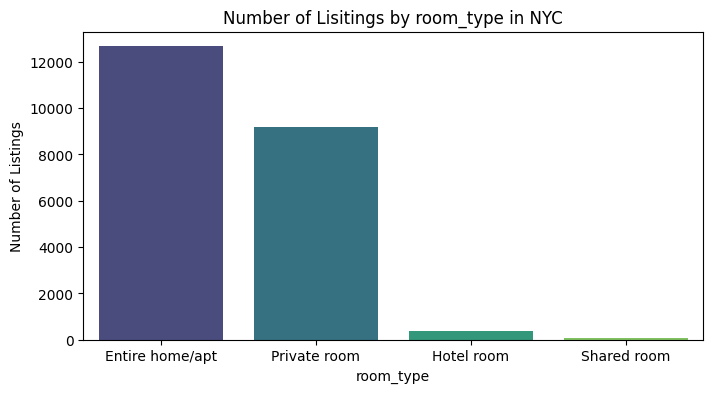

In [39]:
# room type 숙소 갯수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 구별 숙소 개수 집계
borough_counts = df['room_type'].value_counts().reset_index()
borough_counts.columns = ['room_type', 'count']

plt.figure(figsize=(8,4))
sns.barplot(x='room_type', y='count', data=borough_counts, palette='viridis')
plt.title('Number of Lisitings by room_type in NYC')
plt.xlabel('room_type')
plt.ylabel('Number of Listings')
plt.show()


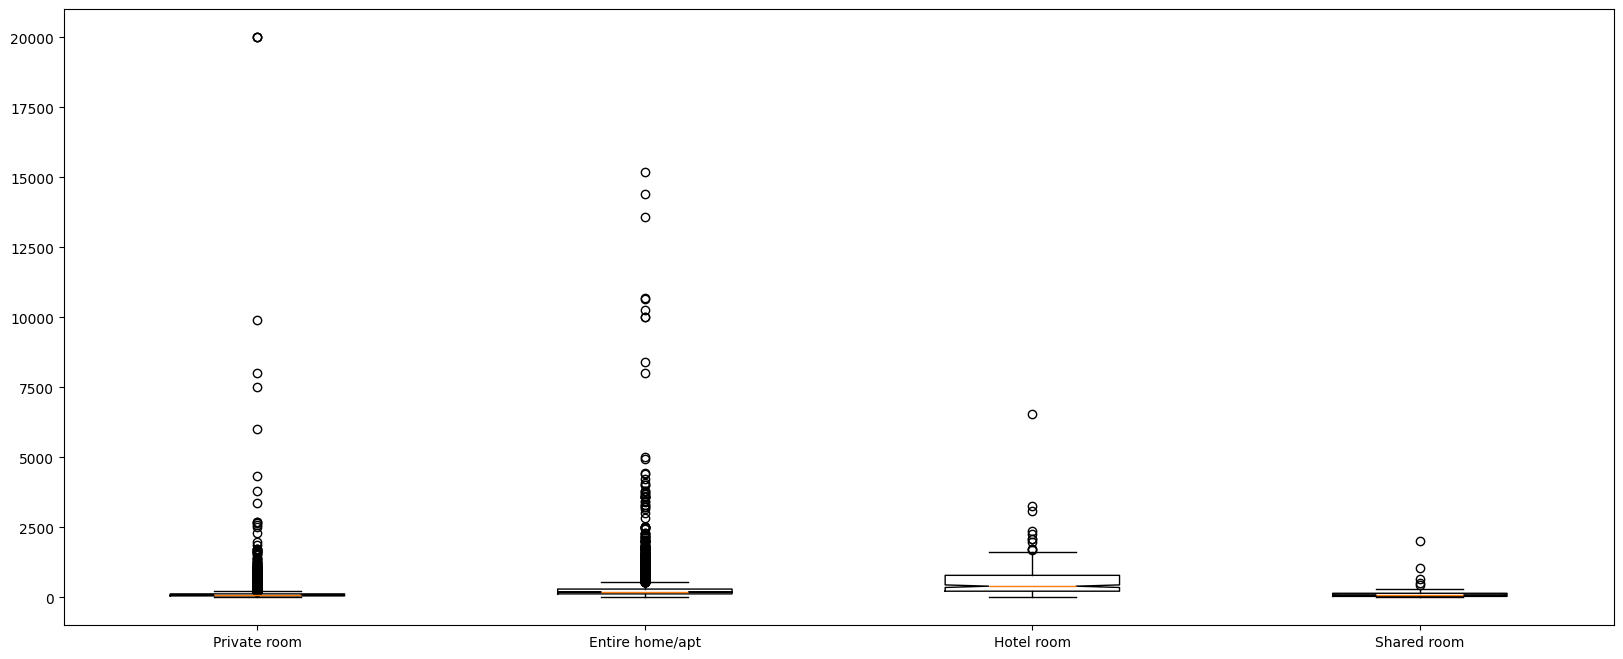

In [38]:
# room type별 이상치 확인

room_types = ['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']

x = room_types
y = []
for i in x:
    y.append(df[df['room_type']==i]['price'].values.tolist())
plt.figure(figsize=(20,8))
plt.boxplot(y, notch=True, whis=1.5) 
plt.xticks([1,2,3,4], x)
plt.show()

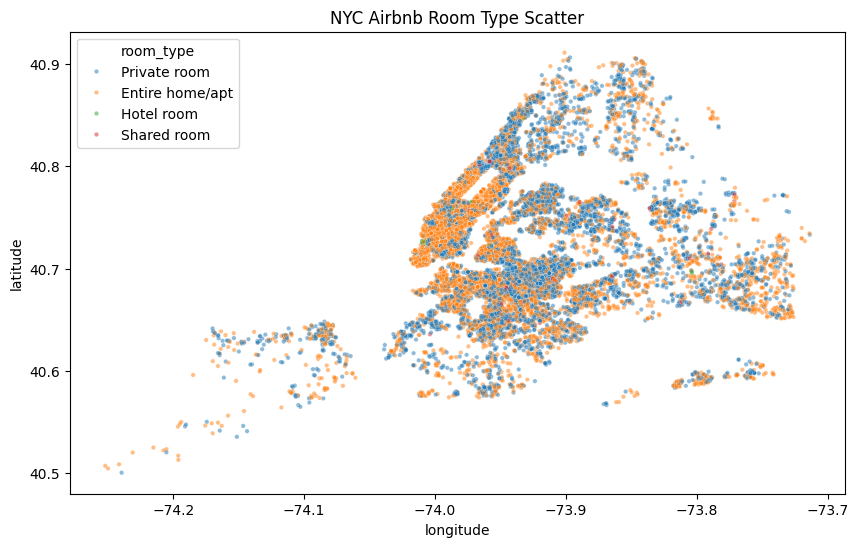

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='room_type', 
    data=df,           # data 프레임을 꼭 지정!
    alpha=0.5,         # 투명도 조절(많을 때)
    s=10               # 점 크기
)
plt.title('NYC Airbnb Room Type Scatter')
plt.show()


### loc_info

In [4]:
loc_cols = ['id', 'host_id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude']
loc_info = df[loc_cols]

In [5]:
loc_info

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
0,36121,62165,Prospect Heights,Brooklyn,40.673760,-73.966110
1,36647,157798,East Harlem,Manhattan,40.792454,-73.940742
2,38663,165789,Boerum Hill,Brooklyn,40.684420,-73.980680
3,38833,166532,Harlem,Manhattan,40.818058,-73.946671
4,39282,168525,Williamsburg,Brooklyn,40.710651,-73.950874
...,...,...,...,...,...,...
37429,1366333532374850165,40019013,Harlem,Manhattan,40.813794,-73.952399
37430,1366717321390111215,483056418,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510
37431,1366721904709517353,30283594,Kips Bay,Manhattan,40.745290,-73.979380
37432,1366722692755341871,407304997,Theater District,Manhattan,40.757133,-73.983124


In [6]:
loc_info.isnull().sum()

id                              0
host_id                         0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
dtype: int64

In [7]:
loc_info['neighbourhood_group_cleansed'].nunique()

5

In [8]:
loc_info['neighbourhood_cleansed'].nunique()

221

In [9]:
loc_info.sort_values('neighbourhood_cleansed')

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
586,759901,873273,Allerton,Bronx,40.866600,-73.855320
29365,984278704291135597,299371992,Allerton,Bronx,40.870717,-73.847323
11286,27343189,204036615,Allerton,Bronx,40.869300,-73.856440
11996,29800915,224206042,Allerton,Bronx,40.859950,-73.862340
12007,30109916,22694324,Allerton,Bronx,40.870050,-73.847290
...,...,...,...,...,...,...
19917,52611423,269909179,Woodside,Queens,40.751930,-73.900490
35005,1250785543979843686,234875736,Woodside,Queens,40.743238,-73.894128
29596,995017187155167022,204704622,Woodside,Queens,40.742190,-73.894990
27853,897949174044168754,23971401,Woodside,Queens,40.744171,-73.896794


In [10]:
loc_info

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
0,36121,62165,Prospect Heights,Brooklyn,40.673760,-73.966110
1,36647,157798,East Harlem,Manhattan,40.792454,-73.940742
2,38663,165789,Boerum Hill,Brooklyn,40.684420,-73.980680
3,38833,166532,Harlem,Manhattan,40.818058,-73.946671
4,39282,168525,Williamsburg,Brooklyn,40.710651,-73.950874
...,...,...,...,...,...,...
37429,1366333532374850165,40019013,Harlem,Manhattan,40.813794,-73.952399
37430,1366717321390111215,483056418,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510
37431,1366721904709517353,30283594,Kips Bay,Manhattan,40.745290,-73.979380
37432,1366722692755341871,407304997,Theater District,Manhattan,40.757133,-73.983124


In [11]:
# 지역별, 동네별 숙소 갯수 세기

area_counts = loc_info.groupby(['neighbourhood_group_cleansed', 'neighbourhood_cleansed']).size()
area_counts = area_counts.reset_index(name='count')
area_counts

,neighbourhood_group_cleansed,neighbourhood_cleansed,count
0,Bronx,Allerton,35
1,Bronx,Baychester,11
2,Bronx,Belmont,22
3,Bronx,Bronxdale,11
4,Bronx,Castle Hill,8
...,...,...,...
216,Staten Island,Tottenville,5
217,Staten Island,West Brighton,22
218,Staten Island,Westerleigh,4
219,Staten Island,Willowbrook,1


/var/folders/6n/tjcbrygj54s39y61m4r7ymrr0000gq/T/ipykernel_85908/1278262392.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='borough', y='count', data=borough_counts, palette='viridis')


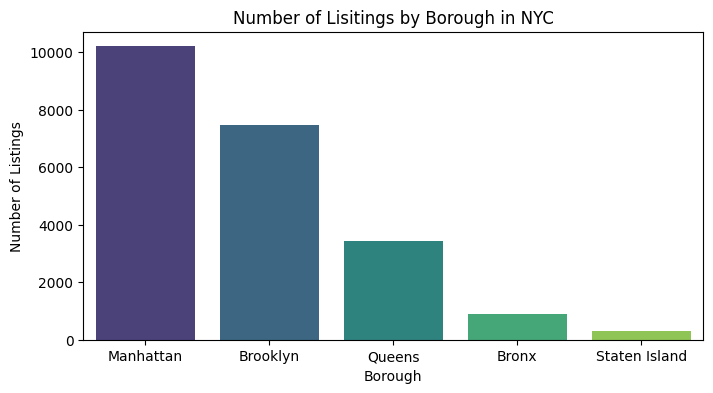

In [17]:
# 지역별, 동네별 숙소 갯수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 구별 숙소 개수 집계
borough_counts = loc_info['neighbourhood_group_cleansed'].value_counts().reset_index()
borough_counts.columns = ['borough', 'count']

plt.figure(figsize=(8,4))
sns.barplot(x='borough', y='count', data=borough_counts, palette='viridis')
plt.title('Number of Lisitings by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.show()


/var/folders/6n/tjcbrygj54s39y61m4r7ymrr0000gq/T/ipykernel_85908/1229549433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_info['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,36121,62165,Prospect Heights,Brooklyn,40.673760,-73.966110,200.0
1,36647,157798,East Harlem,Manhattan,40.792454,-73.940742,82.0
2,38663,165789,Boerum Hill,Brooklyn,40.684420,-73.980680,765.0
3,38833,166532,Harlem,Manhattan,40.818058,-73.946671,139.0
4,39282,168525,Williamsburg,Brooklyn,40.710651,-73.950874,130.0
...,...,...,...,...,...,...,...
37429,1366333532374850165,40019013,Harlem,Manhattan,40.813794,-73.952399,72.0
37430,1366717321390111215,483056418,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510,58.0
37431,1366721904709517353,30283594,Kips Bay,Manhattan,40.745290,-73.979380,299.0
37432,1366722692755341871,407304997,Theater District,Manhattan,40.757133,-73.983124,200.0


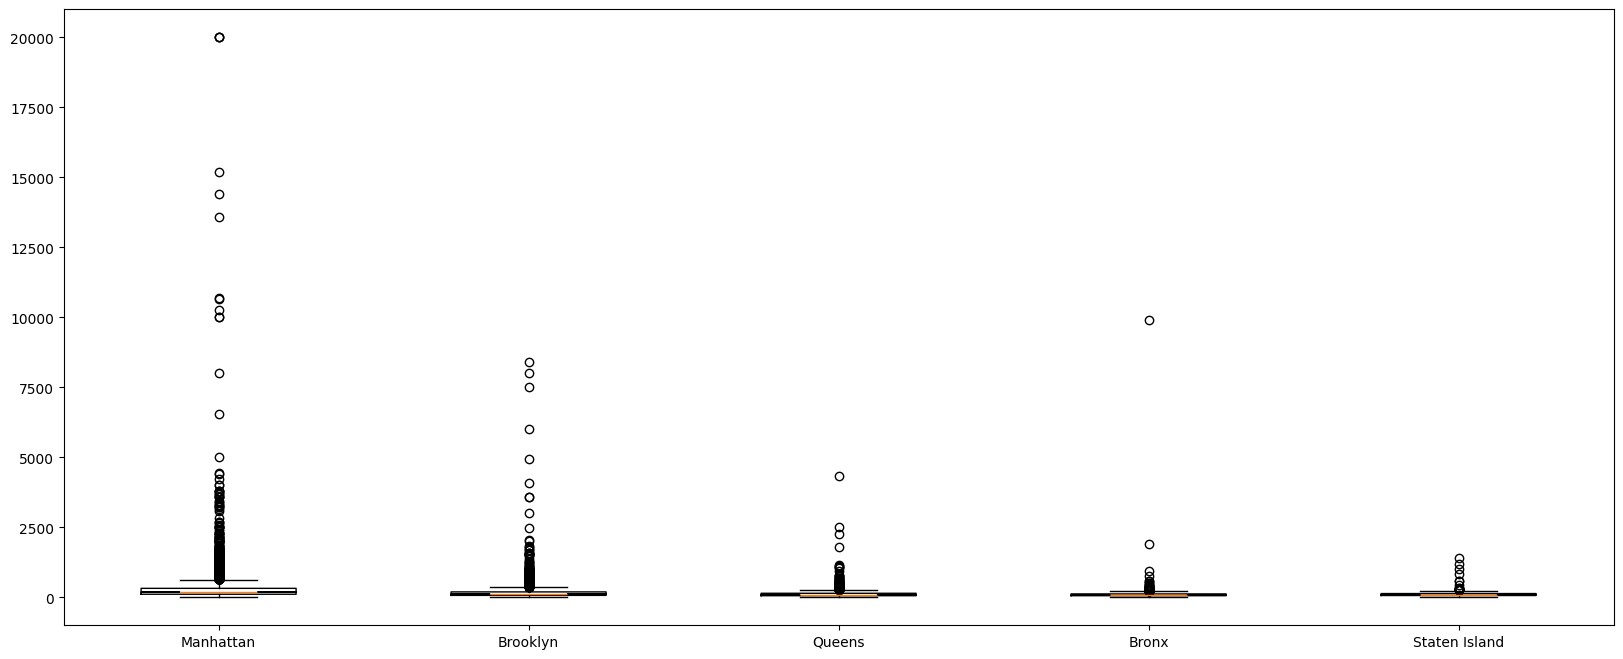

In [ ]:
# 각 구별 이상치 확인

nyc_borough = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

x = nyc_borough
y = []
for i in x:
    y.append(loc_info[loc_info['neighbourhood_group_cleansed']==i]['price'].values.tolist())
plt.figure(figsize=(20,8))
plt.boxplot(y, notch=True, whis=1.5) 
plt.xticks([1,2,3,4,5], x)
plt.show()

In [20]:
def eda_map(df,feature, ax):
    plt.figure(figsize=(15,15))
    image = Image.open("/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png") # Load the image
    df.plot(kind='scatter', x='longitude', y='latitude', label='AirBnB On service', c=str(feature), ax=ax, # Create the scatter plot
            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, s=1)
    ax.imshow(image,extent=[-74.258, -73.7, 40.49,40.92]) # Set the extent of the image

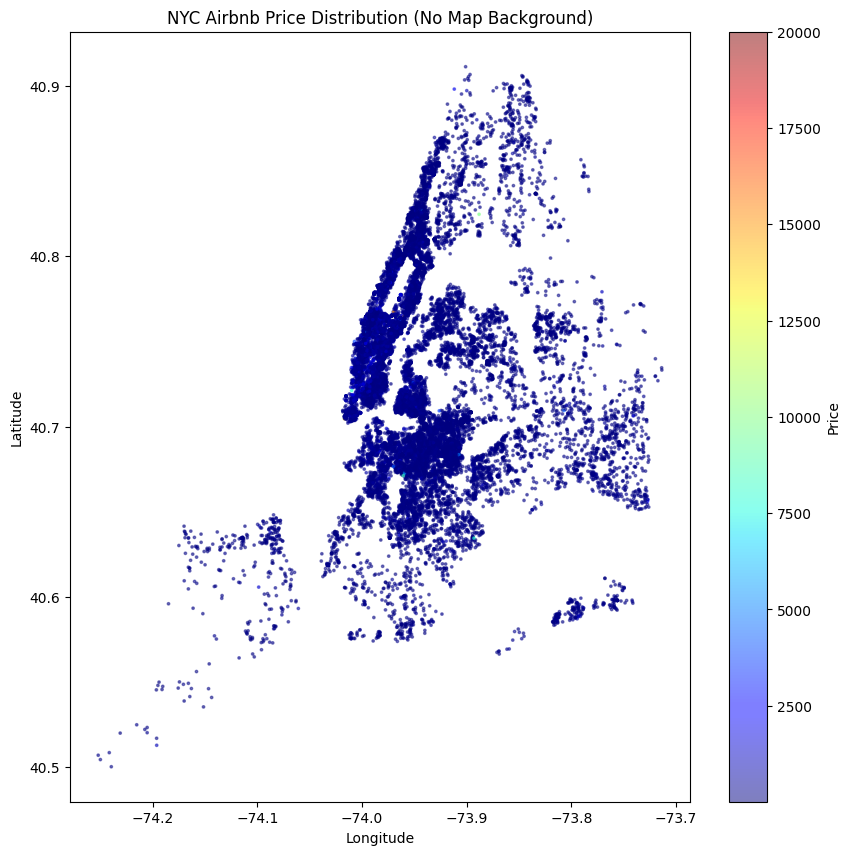

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(
    loc_info['longitude'], loc_info['latitude'],
    c=loc_info['price'], cmap='jet', alpha=0.5, s=3
)
plt.colorbar(label='Price')
plt.title('NYC Airbnb Price Distribution (No Map Background)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [48]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 4.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
from wordcloud import WordCloud

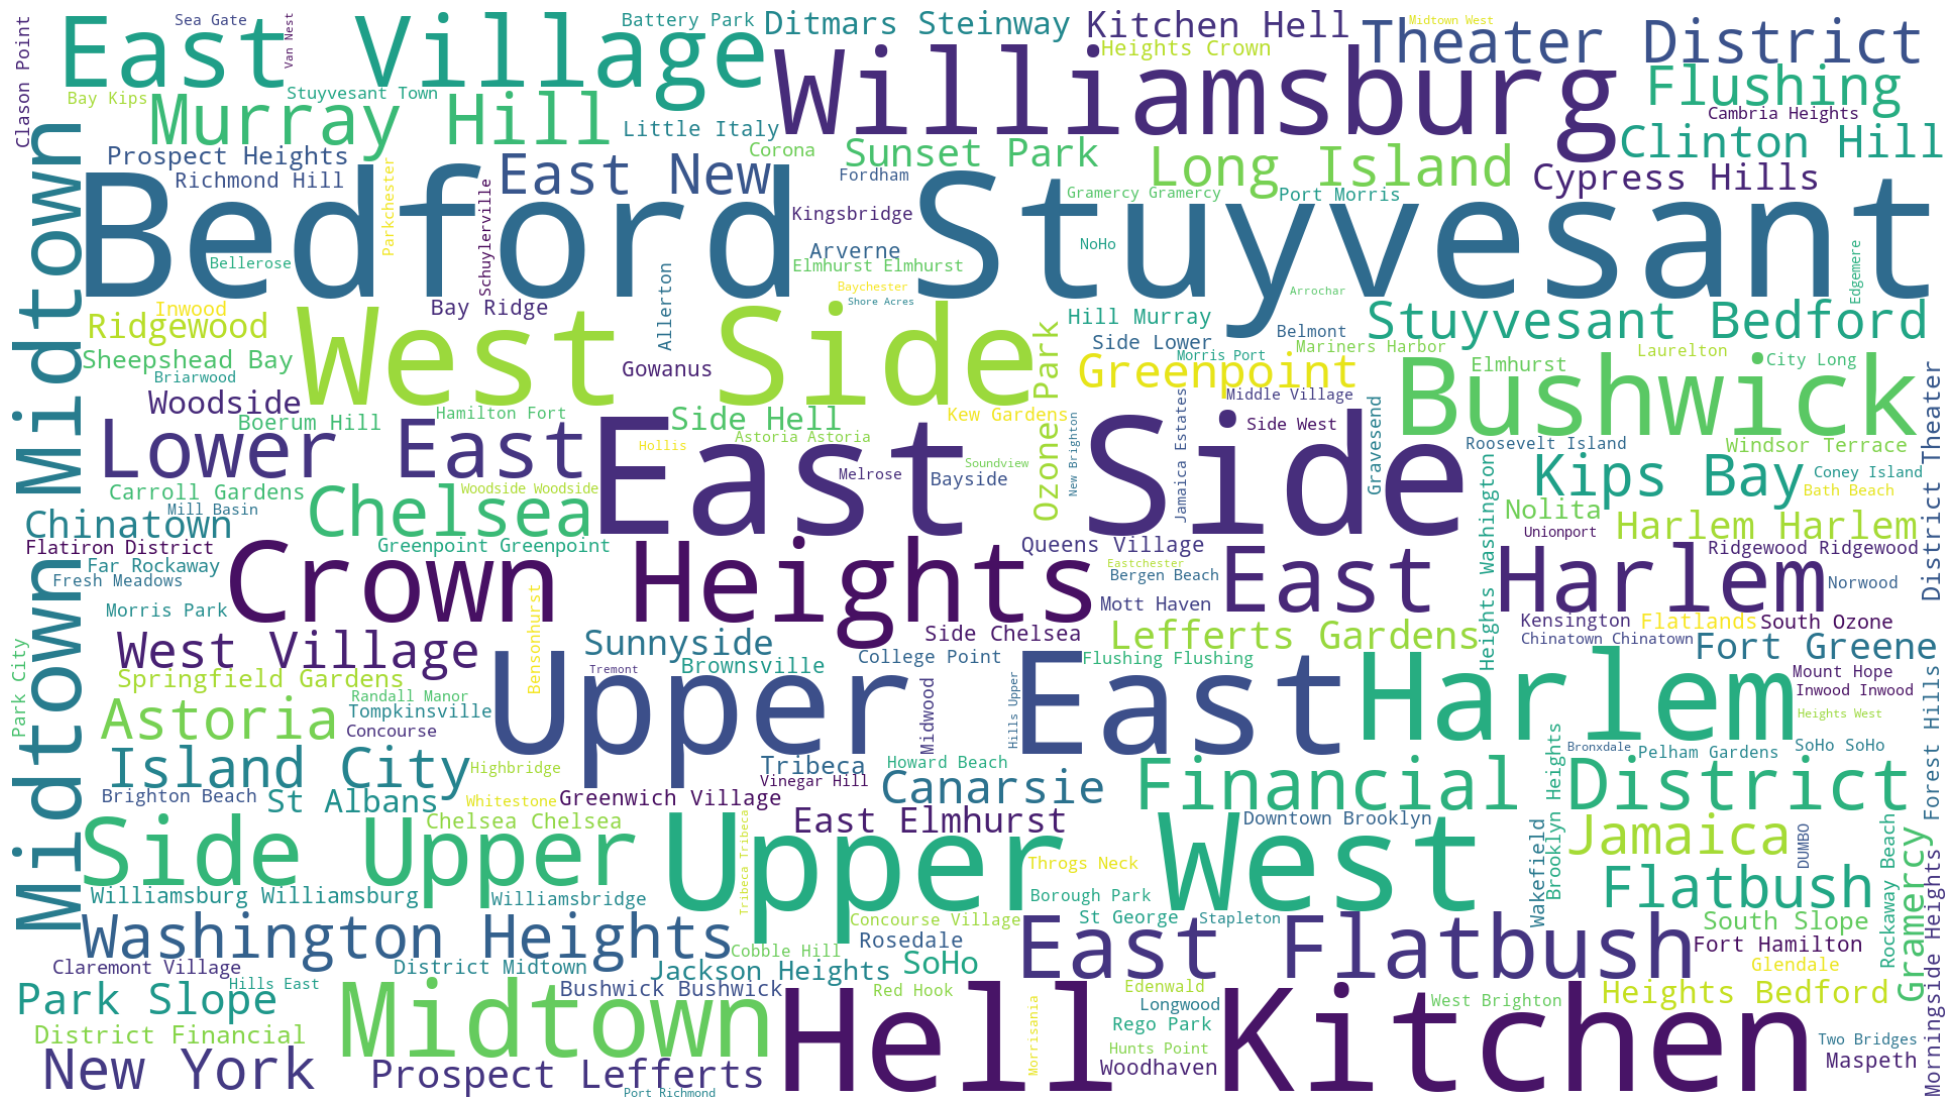

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))

# Series → 문자열로 합치기 (공백 구분)
text = " ".join(loc_info['neighbourhood_cleansed'].astype(str))

wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('neighbourhood_wordcloud.png')
plt.show()


In [26]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 49.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [27]:
import geopandas as gpd

# NYC borough 경계 GeoJSON 불러오기 (URL 또는 로컬)
nyc_gdf = gpd.read_file('https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson')


In [28]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# loc_info에는 latitude, longitude가 들어있음
gdf = gpd.GeoDataFrame(
    loc_info, 
    geometry=gpd.points_from_xy(loc_info['longitude'], loc_info['latitude']),
    crs="EPSG:4326"  # WGS84
)


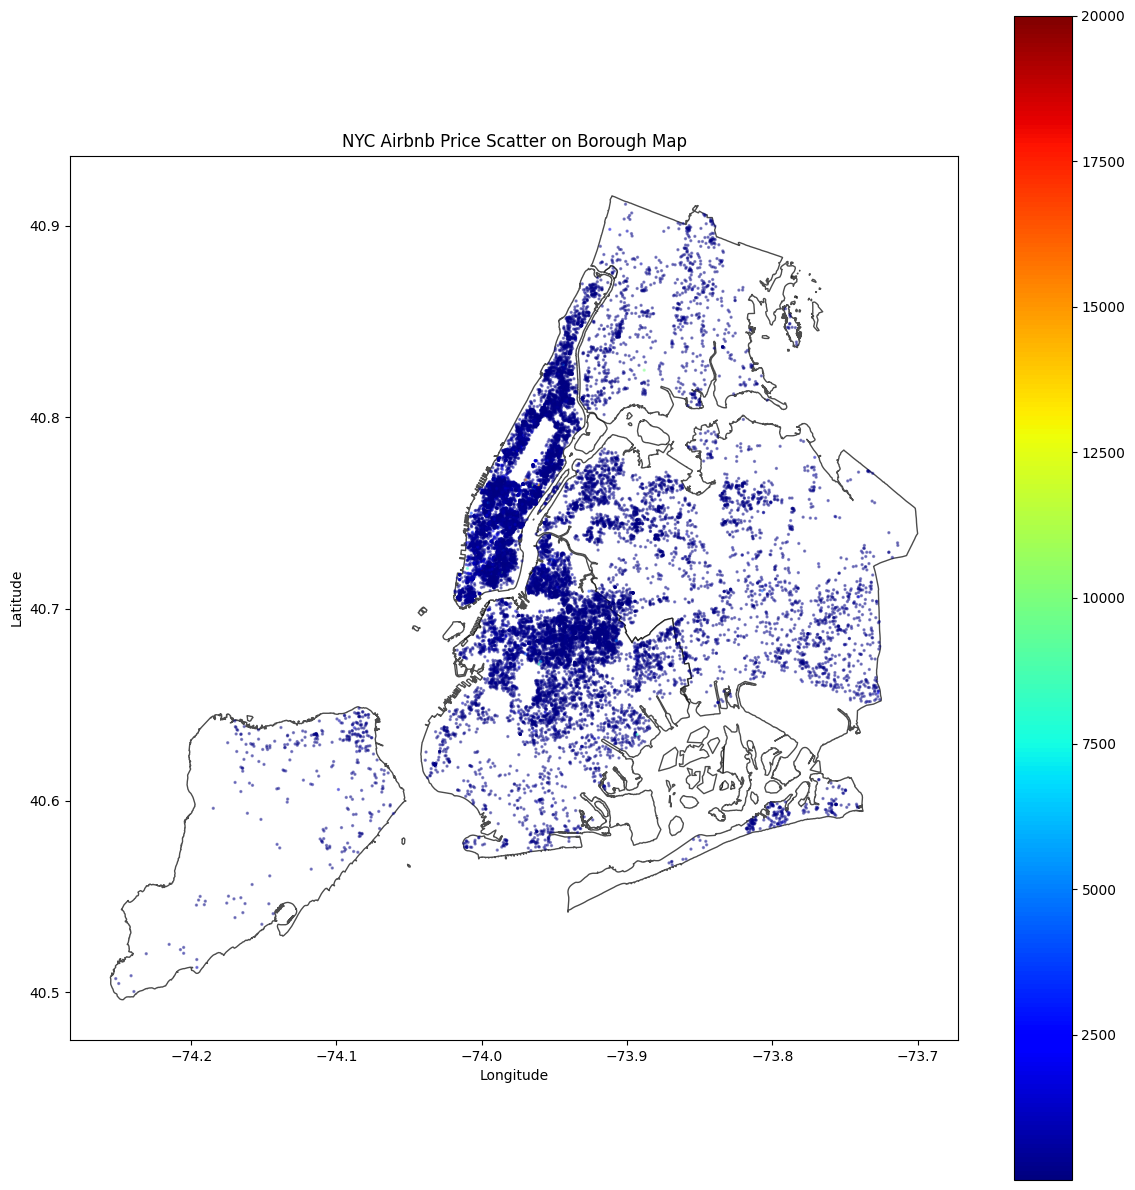

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
# 지도(경계) 먼저 그림
nyc_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=1, alpha=0.7)

# 산점도 추가 (가격에 따라 색상 다르게)
gdf.plot(
    ax=ax, 
    column='price', 
    cmap='jet', 
    markersize=2, 
    alpha=0.4, 
    legend=True
)

plt.title('NYC Airbnb Price Scatter on Borough Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


In [30]:
pip install contextily


  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 27.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 6.3 MB/s eta 0:00:00
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


AttributeError: Stamen

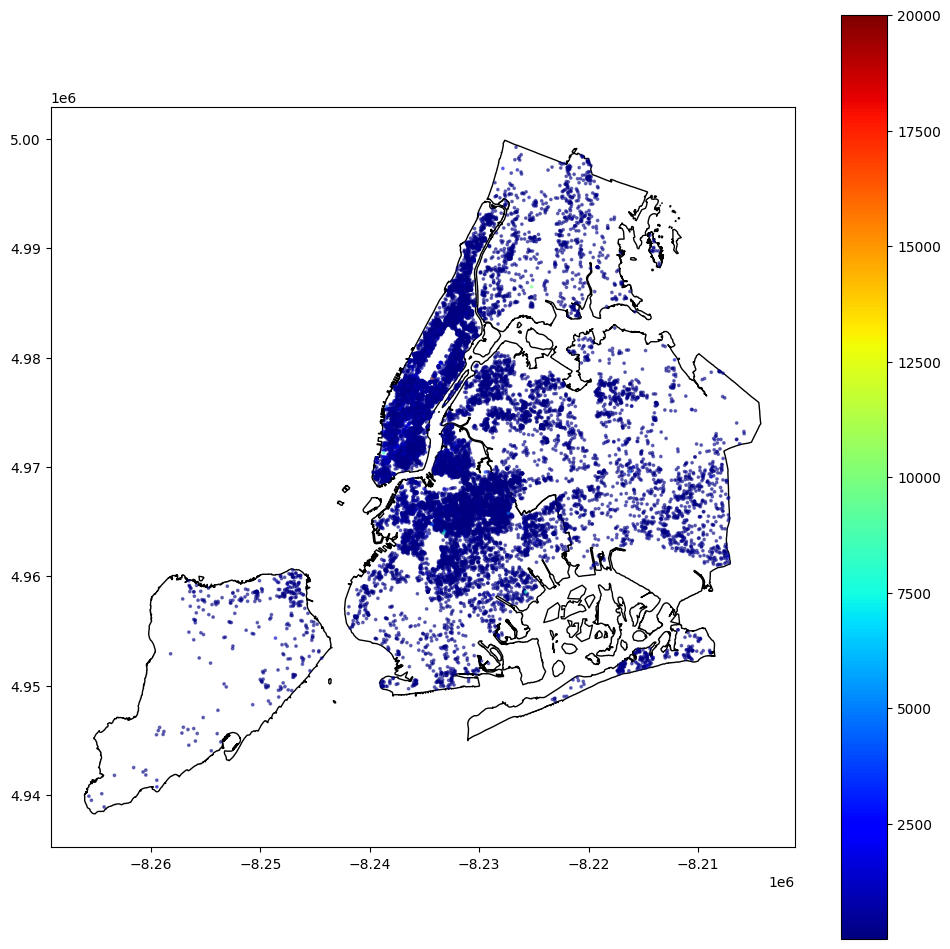

In [31]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

# 1. NYC borough 경계 지도 (이미 geojson이나 shapefile 불러온 상태)
# nyc_gdf: 뉴욕 구 경계 GeoDataFrame
# gdf: 내 숙소 데이터, geometry포인트 포함

# 좌표계 변환 (contextily는 EPSG:3857 필요)
nyc_gdf_3857 = nyc_gdf.to_crs(epsg=3857)
gdf_3857 = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
nyc_gdf_3857.plot(ax=ax, color="none", edgecolor="black", linewidth=1)

# 산점도(스캐터) 얹기
gdf_3857.plot(
    ax=ax,
    column="price",    # 가격 기준 색상
    cmap="jet",
    markersize=3,
    alpha=0.5,
    legend=True
)

# 배경 지도 타일 깔기 (OpenStreetMap 등)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

plt.title("NYC Airbnb Price Scatter on Stamen Map")
plt.axis("off")
plt.tight_layout()
plt.show()


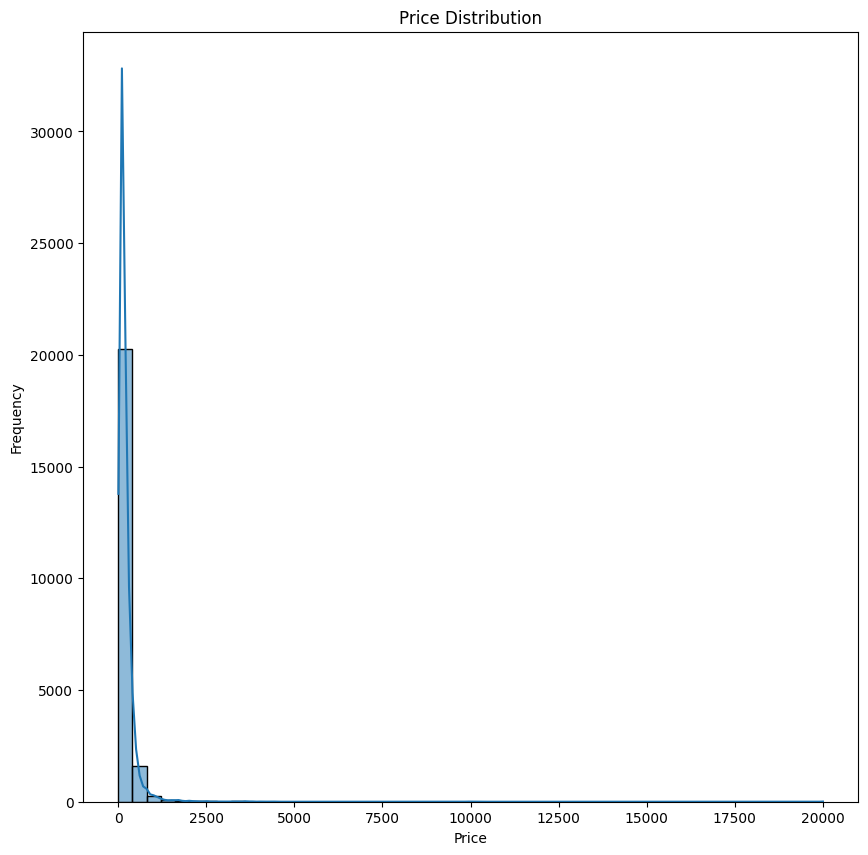

In [43]:
# 가격 분포도

plt.figure(figsize=(10,10))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* right skewness -> log 변환

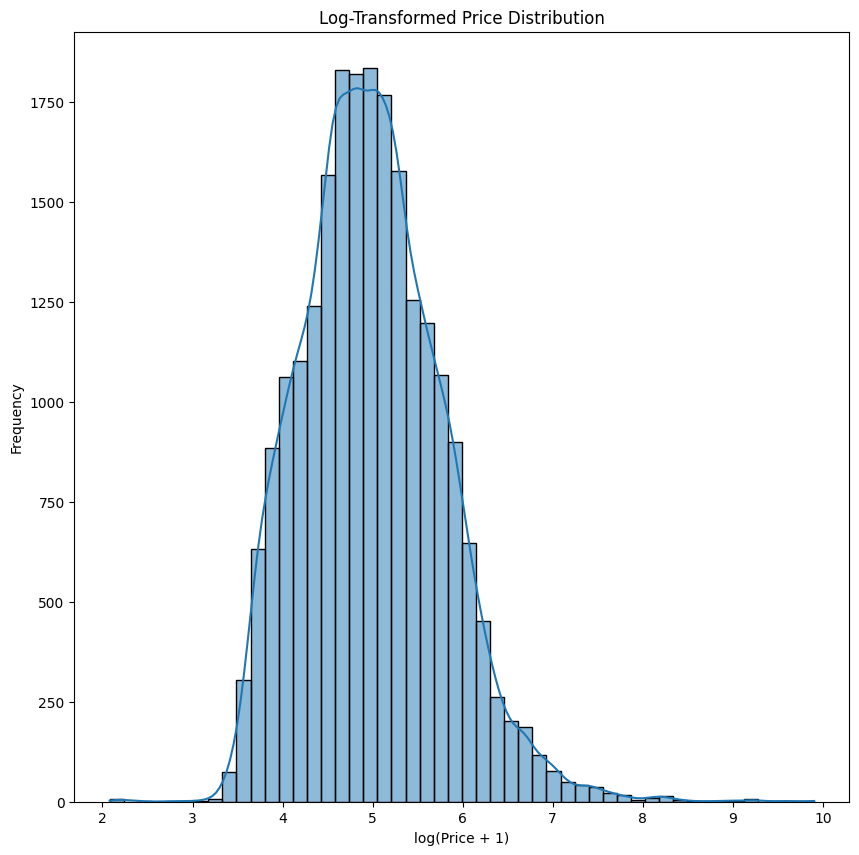

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0 이하 값(혹은 결측치) 제거 (log 계산 안전하게)
filtered = df[df['price'] > 0].copy()

# 로그 변환 (log(x+1))
filtered['log_price'] = np.log1p(filtered['price'])

plt.figure(figsize=(10, 10))
sns.histplot(filtered['log_price'], kde=True, bins=50)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('log(Price + 1)')
plt.ylabel('Frequency')
plt.show()
